In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("stock_market_data_large.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
0,2010-01-01,100.309172,102.741242,99.822837,101.381330,743835,75.905800,0.000000,0.058089,0
1,2010-01-04,101.147509,101.681257,99.244474,100.396541,2693069,81.444127,-0.078559,0.751219,1
2,2010-01-05,101.567491,103.949668,101.509347,103.012156,3027306,71.544018,0.069441,0.979723,1
3,2010-01-06,104.247814,106.652559,102.760082,105.846343,4341338,73.683548,0.410693,-0.858008,0
4,2010-01-07,105.339440,105.983592,103.517541,104.721465,2106182,72.675179,0.583641,0.264456,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target
13642,2062-04-18,43.275041,44.410580,41.142970,41.605722,2764137,31.764587,-1.807202,0.038068,0
13643,2062-04-19,39.024132,41.984653,38.621644,39.210815,1784838,30.837099,-2.290434,0.115523,1
13644,2062-04-20,42.843140,43.711000,39.998519,42.635796,2142188,29.479917,-2.369715,0.636065,0
13645,2062-04-21,41.636775,42.925515,40.098662,41.206622,1160555,34.398739,-2.518833,-0.143514,0
13646,2062-04-24,40.904850,43.993635,39.333408,40.781086,2481904,19.850684,-2.640904,-0.568854,0


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
RSI          0
MACD         0
Sentiment    0
Target       0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,13647.0,1.010968e+02,1.011526e+02,-57.993581,1.676376e+01,7.523206e+01,1.712820e+02,3.229960e+02
High,13647.0,1.026001e+02,1.011773e+02,-56.565948,1.810118e+01,7.676512e+01,1.729486e+02,3.237693e+02
Low,13647.0,9.959930e+01,1.011624e+02,-60.262371,1.512142e+01,7.383389e+01,1.696651e+02,3.209499e+02
Close,13647.0,1.010970e+02,1.011592e+02,-58.538240,1.671165e+01,7.527154e+01,1.712788e+02,3.236221e+02
Volume,13647.0,2.563550e+06,1.404601e+06,100310.000000,1.356426e+06,2.550567e+06,3.779358e+06,4.999938e+06
RSI,13647.0,4.990627e+01,1.504095e+01,0.000000,3.957659e+01,4.991158e+01,6.022049e+01,9.761496e+01
MACD,13647.0,-2.698564e-02,2.203216e+00,-7.384103,-1.472511e+00,1.228432e-02,1.416378e+00,7.288539e+00
Sentiment,13647.0,-1.146381e-03,5.735740e-01,-0.999338,-4.993465e-01,3.137550e-03,4.911611e-01,9.998240e-01
Target,13647.0,5.009160e-01,5.000175e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.shape

(13647, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647 entries, 0 to 13646
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13647 non-null  object 
 1   Open       13647 non-null  float64
 2   High       13647 non-null  float64
 3   Low        13647 non-null  float64
 4   Close      13647 non-null  float64
 5   Volume     13647 non-null  int64  
 6   RSI        13647 non-null  float64
 7   MACD       13647 non-null  float64
 8   Sentiment  13647 non-null  float64
 9   Target     13647 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


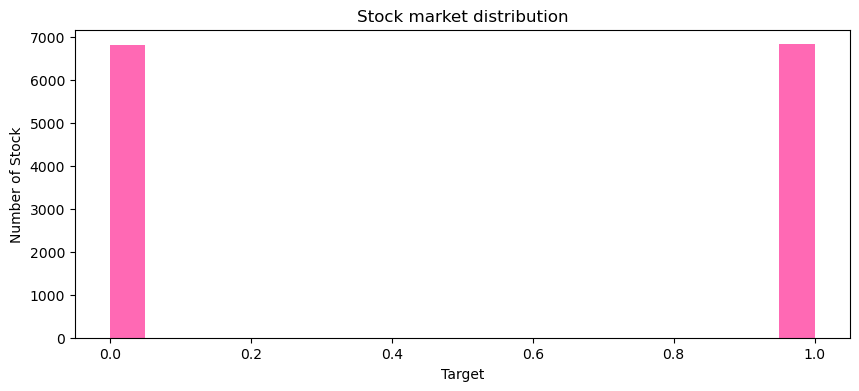

In [9]:
plt.figure(figsize=(10,4))
plt.hist(df['Target'], bins=20, color='hotpink')
plt.title('Stock market distribution')
plt.xlabel('Target')
plt.ylabel('Number of Stock')
plt.show()

In [10]:
df2=pd.get_dummies(df)
df2=df2.astype(float)
df2

,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target,Date_2010-01-01,...,Date_2062-04-11,Date_2062-04-12,Date_2062-04-13,Date_2062-04-14,Date_2062-04-17,Date_2062-04-18,Date_2062-04-19,Date_2062-04-20,Date_2062-04-21,Date_2062-04-24
0,100.309172,102.741242,99.822837,101.381330,743835.0,75.905800,0.000000,0.058089,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101.147509,101.681257,99.244474,100.396541,2693069.0,81.444127,-0.078559,0.751219,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101.567491,103.949668,101.509347,103.012156,3027306.0,71.544018,0.069441,0.979723,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,104.247814,106.652559,102.760082,105.846343,4341338.0,73.683548,0.410693,-0.858008,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,105.339440,105.983592,103.517541,104.721465,2106182.0,72.675179,0.583641,0.264456,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13642,43.275041,44.410580,41.142970,41.605722,2764137.0,31.764587,-1.807202,0.038068,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13643,39.024132,41.984653,38.621644,39.210815,1784838.0,30.837099,-2.290434,0.115523,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13644,42.843140,43.711000,39.998519,42.635796,2142188.0,29.479917,-2.369715,0.636065,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13645,41.636775,42.925515,40.098662,41.206622,1160555.0,34.398739,-2.518833,-0.143514,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: ylabel='Target'>

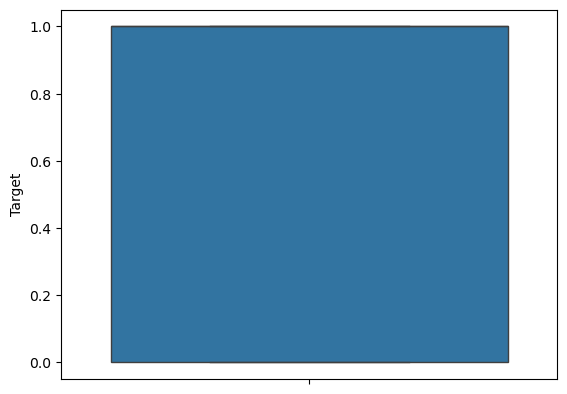

In [11]:
sns.boxplot(df2["Target"])

C:\Users\nulak\AppData\Local\Temp\ipykernel_13112\286125673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Target'])
C:\Users\nulak\AppData\Local\Temp\ipykernel_13112\286125673.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['High'])


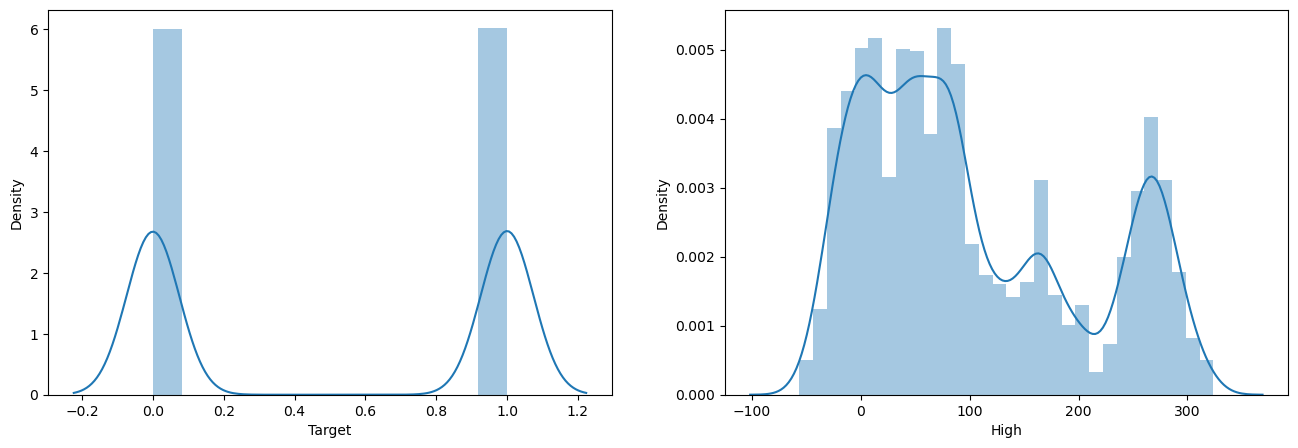

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Target'])

plt.subplot(1,2,2)
sns.distplot(df2['High'])


plt.show()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

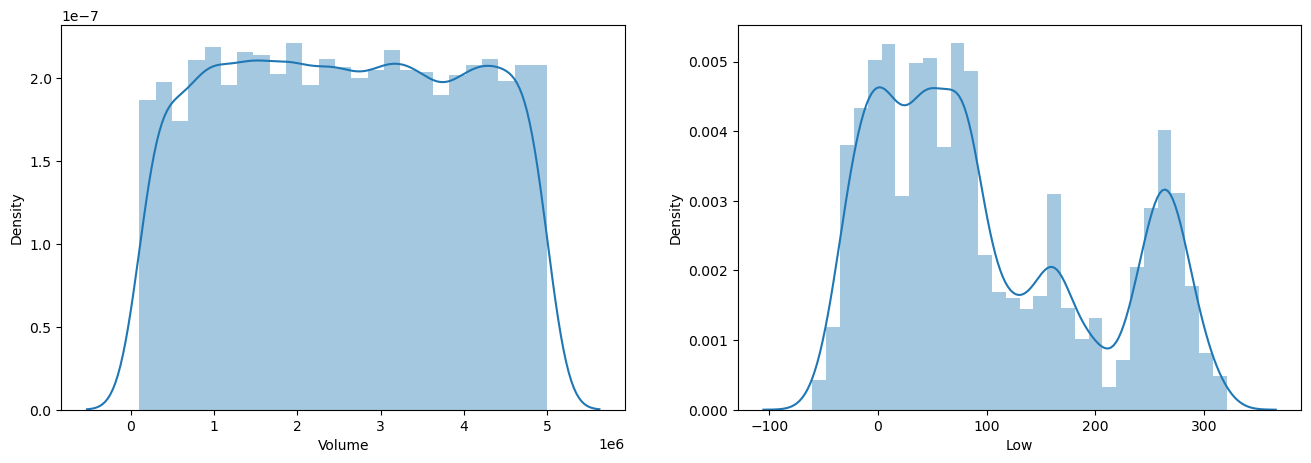

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Volume'])

plt.subplot(1,2,2)
sns.distplot(df2['Low'])


plt.show()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [14]:
percentile25 = df2['Low'].quantile(0.25)
percentile75 = df2['Low'].quantile(0.75)

In [15]:
p25 = df2['Low'].quantile(0.25)
p75 = df2['Low'].quantile(0.75)

In [16]:
percentile25 = df2['Low'].quantile(0.25)
percentile75 = df2['Low'].quantile(0.75)

In [17]:
iqr = percentile75 - percentile25

In [18]:
iqr1 = p75 - p25

In [19]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [20]:
upper = p75 + 1.5 * iqr1
lower = p25 - 1.5 * iqr1

In [21]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 401.4806685842576
Lower limit -216.69412895984155


In [22]:
df[df['Low'] > upper_limit]

,Date,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target


In [23]:
df2[df2['Low'] > upper_limit]

,Open,High,Low,Close,Volume,RSI,MACD,Sentiment,Target,Date_2010-01-01,...,Date_2062-04-11,Date_2062-04-12,Date_2062-04-13,Date_2062-04-14,Date_2062-04-17,Date_2062-04-18,Date_2062-04-19,Date_2062-04-20,Date_2062-04-21,Date_2062-04-24


In [24]:
print(df2['Target'].skew())
print(df2['High'].skew())
print(df2['Volume'].skew())
print(df2['Low'].skew())

-0.0036642178054950795
0.5782996429123015
0.003711389327932355
0.5786326486588846


In [25]:
x = df2.drop(['Open','Target'], axis=1)  
y = df2['Target']

In [26]:
x.shape

(13647, 13654)

In [27]:
x.head(4)

,High,Low,Close,Volume,RSI,MACD,Sentiment,Date_2010-01-01,Date_2010-01-04,Date_2010-01-05,...,Date_2062-04-11,Date_2062-04-12,Date_2062-04-13,Date_2062-04-14,Date_2062-04-17,Date_2062-04-18,Date_2062-04-19,Date_2062-04-20,Date_2062-04-21,Date_2062-04-24
0,102.741242,99.822837,101.381330,743835.0,75.905800,0.000000,0.058089,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101.681257,99.244474,100.396541,2693069.0,81.444127,-0.078559,0.751219,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103.949668,101.509347,103.012156,3027306.0,71.544018,0.069441,0.979723,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,106.652559,102.760082,105.846343,4341338.0,73.683548,0.410693,-0.858008,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y.shape

(13647,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

In [30]:
print(X_train.shape)
print(X_test.shape)

(9552, 13654)
(4095, 13654)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg = LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(X_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test,y_pred)

0.083048045892966

In [37]:
reg.coef_

array([ 0.06280079,  0.06274377, -0.12552442, ..., -0.29521726,
        0.        , -0.43529046])

In [38]:
reg.intercept_

0.12079004279954292

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
reg.predict(X_test.iloc[0].values.reshape(1,-1))

array([0.77005978])

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [60]:
y_pred = reg.predict(X_test)

In [62]:
y_test.values

array([1., 0., 0., ..., 1., 1., 1.])

In [64]:
mae= mean_absolute_error(y_test,y_pred)
print(f'MAE: {mae:.2f}')


MAE: 0.46


In [66]:
mse= mean_squared_error(y_test,y_pred)
print(f'MSE: {mse:.2f}')

MSE: 0.23


In [68]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.4786423900592208


In [70]:
print("R2",r2_score(y_test,y_pred))

R2 0.083048045892966


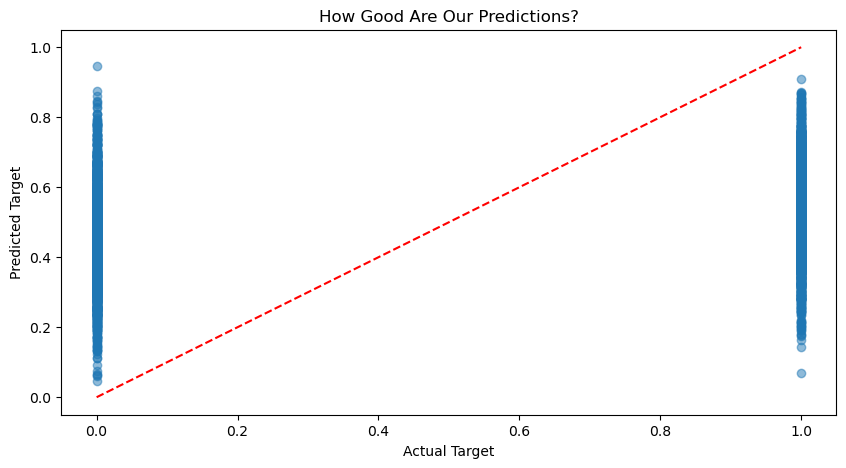

In [74]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('How Good Are Our Predictions?')
plt.show()